In [2]:
import numpy as np
import pandas as pd
import os
from keras.utils import to_categorical

from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target

target_names = lfw_people.target_names

In [3]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [6]:
y = to_categorical(y)
y[:3]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=300)

In [8]:
X_train.shape

(988, 1850)

In [9]:
h, w

(50, 37)

In [18]:
X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])
X_train.shape

(988, 50, 37, 1)

In [13]:
X_train[0].min(),X_train[0].max()

(2.6666667, 203.0)

In [19]:
X_train = X_train/255
X_test = X_test/255
X_train[0].min(),X_train[0].max()

(0.10065359, 0.97908497)

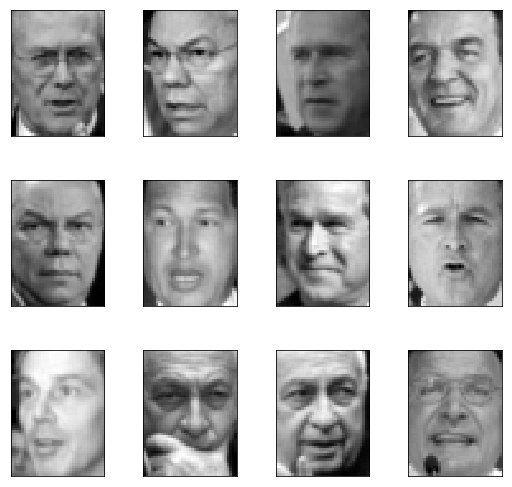

In [20]:
import matplotlib.pyplot as plt

images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [21]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping

from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(100,activation="relu"))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               185100    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 707       
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy"])

early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(X_train, y_train, 
          validation_split = 0.2, 
          epochs=100, 
          callbacks=[early_stopping])

model.evaluate(X_test, y_test)

Train on 790 samples, validate on 198 samples
Epoch 1/100
790/790 [==============================] - 1s 886us/step - loss: 1.8757 - categorical_accuracy: 0.3797 - val_loss: 1.7417 - val_categorical_accuracy: 0.4192
Epoch 2/100
790/790 [==============================] - 0s 444us/step - loss: 1.6852 - categorical_accuracy: 0.4266 - val_loss: 1.6435 - val_categorical_accuracy: 0.4141

[0.7287315845489502, 0.7500000007947286]

In [29]:
model = Sequential()
model.add(Conv2D(16,
                 (3,3),
                 activation="relu",
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(y_train.shape[1],activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy"])

early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(X_train, y_train, 
          validation_split = 0.2, 
          epochs=100, 
          callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 35, 16)        160       
_________________________________________________________________
flatten_4 (Flatten)          (None, 26880)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               2688100   
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 707       
Total params: 2,688,967
Trainable params: 2,688,967
Non-trainable params: 0
_________________________________________________________________
Train on 790 samples, validate on 198 samples
Epoch 1/100
790/790 [==============================] - 4s 5ms/step - loss: 2.0166 - categorical_accuracy: 0.3873 - val_loss: 1.7107 - val_categorical_accuracy: 0.4192

[0.6797364894549052, 0.7799999992052714]

In [31]:
model = Sequential()
model.add(Conv2D(16,
                 (3,3),
                 activation="relu",
                 input_shape=X_train.shape[1:]))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(y_train.shape[1],activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy"])

early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(X_train, y_train, 
          validation_split = 0.2, 
          epochs=100, 
          callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 35, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 17, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6528)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               652900    
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 707       
Total params: 653,767
Trainable params: 653,767
Non-trainable params: 0
_________________________________________________________________
Train on 790 samples, validate on 198 samples
Epoch 1/100
790/790 [==============================] - 3s 3ms/step - loss: 1.7406 - catego

[0.4140499667326609, 0.8766666674613952]

In [33]:
model = Sequential()
model.add(Conv2D(16,
                 (3,3),
                 activation="relu",
                 input_shape=X_train.shape[1:]))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(y_train.shape[1],activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy"])

early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(X_train, y_train, verbose=0,
          validation_split = 0.2, 
          epochs=100, 
          callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 35, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 17, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6528)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 45703     
Total params: 45,863
Trainable params: 45,863
Non-trainable params: 0
_________________________________________________________________


KeyboardInterrupt: 

Zdefiniuj funkcję, która przyjmuje liczbę filtrów jako argument i zwraca skompilowaną sieć o powyższej strukturze. Następnie przestestuj takie sieci dla różnych liczb filtrów.

In [42]:
def build_model(n_filters, 
                input_shape=X_train.shape[1:],
                n_classes=y_train.shape[1]):
    
    model = Sequential()
    model.add(Conv2D(n_filters,
                     (4,4),
                     activation="relu",
                     input_shape=input_shape))
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    model.add(Dense(n_classes,activation="softmax"))

    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["categorical_accuracy"])
    return model

In [43]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    early_stopping = EarlyStopping(patience=3, monitor="val_loss")
    model.fit(X_train, y_train, verbose=0,
          validation_split = 0.2, 
          epochs=100, 
          callbacks=[early_stopping])

    return model.evaluate(X_test, y_test)[1]

In [44]:
for n_filters in [4,8,16,32,64]:
    model = build_model(n_filters)
    print(n_filters, evaluate_model(model, X_train, X_test, y_train, y_test))

300/300 [==============================] - 0s 847us/step
4 0.8633333325386048
300/300 [==============================] - 0s 644us/step
8 0.8566666658719381
300/300 [==============================] - 0s 755us/step
16 0.8433333333333334
300/300 [==============================] - 0s 969us/step

Przestestuj w sposób zautomatyzowany (nie pisząc za każdym razem kodu tworzącego sieć) sieci z poolingami:

MaxPooling2D z obszarów 2x2 i 4x4 oraz

AveragePooling2D z obszarów 2x2 i 4x4

In [49]:
from keras.layers import AveragePooling2D, Convolution2D

In [51]:
?Convolution2D

In [53]:
?MaxPool2D

In [52]:
def build_model(pooling_layer, 
                input_shape=X_train.shape[1:],
                n_classes=y_train.shape[1]):
    
    model = Sequential()
    model.add(Conv2D(16,
                     (3,3),
                     activation="relu",
                     input_shape=input_shape))
    model.add(pooling_layer)
    model.add(Flatten())
    model.add(Dense(n_classes,activation="softmax"))

    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["categorical_accuracy"])
    return model

In [56]:
for pool in [MaxPool2D, AveragePooling2D]:
    for size in [(2,2),(4,4)]:
        model = build_model(pool(size))
        print(evaluate_model(model, X_train, X_test, y_train, y_test))

300/300 [==============================] - 0s 487us/step
0.8699999992052714


KeyboardInterrupt: 

(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
[[[170 180 198]
  [168 178 196]
  [177 185 203]
  ...
  [162 179 215]
  [158 178 214]
  [157 177 212]]

 [[168 181 198]
  [172 185 201]
  [171 183 200]
  ...
  [159 177 212]
  [156 176 211]
  [154 174 209]]

 [[154 170 186]
  [149 165 181]
  [129 144 162]
  ...
  [161 178 214]
  [157 177 212]
  [154 174 209]]

 ...

 [[ 74  84  80]
  [ 76  85  81]
  [ 78  85  82]
  ...
  [ 71  75  78]
  [ 68  72  75]
  [ 61  65  68]]

 [[ 68  76  77]
  [ 69  77  78]
  [ 72  79  78]
  ...
  [ 76  80  83]
  [ 71  75  78]
  [ 71  75  78]]

 [[ 67  75  78]
  [ 68  76  79]
  [ 69  75  76]
  ...
  [ 75  79  82]
  [ 71  75  78]
  [ 73  77  80]]]


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


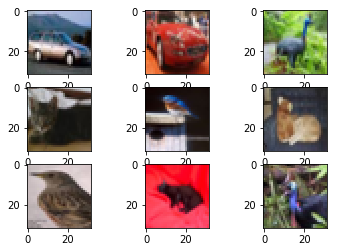

In [57]:
from keras.datasets import cifar10
from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train<nb_classes)[0]][:n_samples], y_train[np.where(y_train<nb_classes)[0]][:n_samples]
X_test, y_test = X_test[np.where(y_test<nb_classes)[0]], y_test[np.where(y_test<nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0])

# create a grid of 3x3 images
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(toimage(X_train[i]))
# show the plot
plt.show()

In [58]:
X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [62]:
model = Sequential()
model.add(Conv2D(6,(5,5),activation="relu",
                 input_shape=X_train.shape[1:]))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16,(5,5),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(120,activation="relu"))
model.add(Dense(84,activation="relu"))
model.add(Dense(y_train.shape[1],activation="softmax"))

model.summary()

model.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["categorical_accuracy"])
    
early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(X_train, y_train,
      validation_split = 0.15, 
      epochs=100, 
      callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_38 (Dense)             (None, 84)                10164     
__________

[0.7699312281608581, 0.7275]

Padding

In [64]:
model = Sequential()
model.add(Conv2D(6,(5,5),activation="relu",padding="same",
                 input_shape=X_train.shape[1:]))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16,(5,5),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(120,activation="relu"))
model.add(Dense(84,activation="relu"))
model.add(Dense(y_train.shape[1],activation="softmax"))

model.summary()

model.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["categorical_accuracy"])
    
early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(X_train, y_train,
      validation_split = 0.15, 
      epochs=100, 
      callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_41 (Dense)             (None, 84)                10164     
__________

[0.6832155351638793, 0.7535]

1. Zaimplementuj funkcję, która przyjmuje listę liczb całkowitych i buduje sieć konwolucyjną, o części konwoulucyjnej takiej jak w powyższej sieci oraz części klasyfikacyjnej składającej się z warstw gęstych o liczbach neuronów równym kolejnym liczbom z listy (warstwa wyściowa stała niezależna od parametrów. Jeżeli argument ma wartość None, to nie ma warstw gęstych (oprócz wyjściowej).

2. Dodaj do funkcji argument logiczny, który ustawiony na True sprawia, że po każdej warstwie (pooling i dense) dodawany jest dropout rzędu 0.5.

In [72]:
from keras.layers import Dropout

In [73]:
def build_model(dense_layer_sizes=None, add_dropout=False):
    
    model = Sequential()
    
    model.add(Conv2D(6,(5,5),activation="relu",padding="same",
                     input_shape=X_train.shape[1:]))
    model.add(MaxPool2D((2,2)))
    if add_dropout:
        model.add(Dropout(0.5))
    
    model.add(Conv2D(16,(5,5),activation="relu"))
    model.add(MaxPool2D((2,2)))
    if add_dropout:
        model.add(Dropout(0.5))
        
    model.add(Flatten())
    
    if dense_layer_sizes:
        for dense_size in dense_layer_sizes:
            model.add(Dense(dense_size,activation="relu"))
            if add_dropout:
                model.add(Dropout(0.5))
    
    model.add(Dense(y_train.shape[1],activation="softmax"))


    model.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["categorical_accuracy"])
    return model


In [75]:
model = build_model([100,50],True)

model.summary()

early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(X_train, y_train,
      validation_split = 0.15, 
      epochs=100, 
      callbacks=[early_stopping])

model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 6)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 576)               0         
__________

[0.6868032884597778, 0.73125]

In [76]:
from keras.preprocessing.image import ImageDataGenerator

In [82]:
train_data_dir = '/home/kodolamacz/Pobrane/kagglecatsanddogs_3367a/PetImages/data/train/'
validation_data_dir = '/home/kodolamacz/Pobrane/kagglecatsanddogs_3367a/PetImages/data/validation/'
nb_train_samples = 1607
nb_validation_samples = 363
epochs = 50
batch_size = 16

h, w = 32, 32

In [99]:
train_generator = ImageDataGenerator(rescale=1/255,
                                     rotation_range=90,
                                     zoom_range=0.2,
                                     horizontal_flip=True)
validation_generator = ImageDataGenerator(rescale=1/255)

train_flow = train_generator.flow_from_directory(
    directory=train_data_dir, batch_size=batch_size, 
    target_size=(h,w), class_mode="binary")

validation_flow = validation_generator.flow_from_directory(
    directory=validation_data_dir, batch_size=batch_size, 
    target_size=(h,w), class_mode="binary")

Found 1607 images belonging to 2 classes.
Found 363 images belonging to 2 classes.


In [100]:
model = Sequential()
model.add(Conv2D(6,(5,5),activation="relu",padding="same",
                 input_shape=X_train.shape[1:]))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16,(5,5),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(120,activation="relu"))
model.add(Dense(84,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [101]:
model.fit_generator(generator=train_flow, 
                    samples_per_epoch=nb_train_samples,
                    
                    validation_data=validation_flow,
                    nb_val_samples=nb_validation_samples,
                    
                    epochs=10)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., validation_data=<keras_pre..., epochs=10, steps_per_epoch=100, validation_steps=363)`


Epoch 1/10
100/100 [==============================] - 31s 312ms/step - loss: 0.6936 - acc: 0.5162 - val_loss: 0.6908 - val_acc: 0.5510

In [ ]:
model.evaluate_generator(...)

In [102]:
from keras.applications import MobileNet

h,w = 160, 160
base_model = MobileNet(weights='imagenet',
                     include_top=False,
                     input_shape=(h, w, 3))

In [103]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128       
__________

In [107]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(50,activation="relu"))
top_model.add(Dense(1,activation="sigmoid"))
top_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_44 (Flatten)         (None, 25600)             0         
_________________________________________________________________
dense_73 (Dense)             (None, 50)                1280050   
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 51        
Total params: 1,280,101
Trainable params: 1,280,101
Non-trainable params: 0
_________________________________________________________________


In [114]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False

transfer_model.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_160 (Model)   (None, 5, 5, 1024)        3228864   
_________________________________________________________________
sequential_46 (Sequential)   (None, 1)                 1280101   
Total params: 4,508,965
Trainable params: 1,280,101
Non-trainable params: 3,228,864
_________________________________________________________________


In [115]:
train_generator = ImageDataGenerator(rescale=1/255,
                                     rotation_range=90,
                                     zoom_range=0.2,
                                     horizontal_flip=True)
validation_generator = ImageDataGenerator(rescale=1/255)

train_flow = train_generator.flow_from_directory(
    directory=train_data_dir, batch_size=batch_size, 
    target_size=(h,w), class_mode="binary")

validation_flow = validation_generator.flow_from_directory(
    directory=validation_data_dir, batch_size=batch_size, 
    target_size=(h,w), class_mode="binary")

transfer_model.fit_generator(generator=train_flow, 
                    samples_per_epoch=nb_train_samples,
                    
                    validation_data=validation_flow,
                    nb_val_samples=nb_validation_samples,
                    
                    epochs=10)

Found 1607 images belonging to 2 classes.
Found 363 images belonging to 2 classes.


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., validation_data=<keras_pre..., epochs=10, steps_per_epoch=100, validation_steps=363)`


Epoch 1/10
100/100 [==============================] - 491s 5s/step - loss: 0.5657 - acc: 0.8156 - val_loss: 0.1359 - val_acc: 0.9447

KeyboardInterrupt: 

In [119]:
h,w

(160, 160)

In [120]:
transfer_model.predict_generator(validation_flow,10)

array([[9.9986279e-01],
       [9.9999094e-01],
       [9.9175173e-01],
       [9.9999344e-01],
       [9.9999976e-01],
       [2.8983608e-01],
       [9.9999237e-01],
       [3.5802422e-08],
       [9.9999607e-01],
       [8.1495893e-01],
       [7.1384084e-01],
       [4.5393077e-01],
       [9.9999845e-01],
       [9.9903929e-01],
       [9.9995995e-01],
       [9.9963927e-01],
       [1.3704550e-04],
       [9.9990916e-01],
       [1.7122583e-01],
       [9.9999845e-01],
       [6.2640243e-06],
       [5.0055826e-01],
       [6.9263182e-04],
       [9.9999952e-01],
       [9.4975150e-01],
       [1.1673563e-02],
       [9.9999940e-01],
       [9.9997950e-01],
       [8.7035990e-01],
       [9.9742943e-01],
       [9.9999976e-01],
       [9.9856383e-01],
       [1.3666463e-05],
       [5.4489094e-01],
       [4.4576758e-05],
       [9.9992645e-01],
       [9.9997973e-01],
       [9.9923158e-01],
       [3.4928554e-01],
       [9.9947721e-01],
       [1.0915776e-04],
       [9.997360

In [121]:
from keras.models import Model

In [126]:
base_model.layers[36]

In [131]:
feature_extractor = Model(inputs = base_model.inputs,
                          outputs = base_model.layers[36].output)

feature_extractor

In [132]:
transfer_model = Sequential()
transfer_model.add(feature_extractor)
transfer_model.add(Flatten())
transfer_model.add(Dense(1,activation="sigmoid"))
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 20, 20, 256)       137152    
_________________________________________________________________
flatten_45 (Flatten)         (None, 102400)            0         
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 102401    
Total params: 239,553
Trainable params: 236,609
Non-trainable params: 2,944
_________________________________________________________________


Dokleić do fragmentu sieci bazowej siec jednowarstowowa konwolucyjną z poolingiem.

In [133]:
transfer_model2 = Sequential()
transfer_model2.add(feature_extractor)
transfer_model2.add(Conv2D(64,(2,2),padding = "same",activation="relu"))
transfer_model2.add(MaxPool2D(2,2))
transfer_model2.add(Flatten())
transfer_model2.add(Dense(1,activation="sigmoid"))


NameError: name 'transfer_model2summary' is not defined

In [134]:
transfer_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 20, 20, 256)       137152    
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 20, 20, 64)        65600     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 6401      
Total params: 209,153
Trainable params: 206,209
Non-trainable params: 2,944
_________________________________________________________________
